In [1]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Project 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC") # fix timestamps loaded by spark
    .getOrCreate()
)

your 131072x1 screen size is bogus. expect trouble
23/08/21 04:36:37 WARN Utils: Your hostname, DESKTOP-SATV84A resolves to a loopback address: 127.0.1.1; using 172.26.254.29 instead (on interface eth0)
23/08/21 04:36:37 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/21 04:36:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/21 04:36:39 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/08/21 04:36:39 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


# External Data Analysis

### Outlier analysis, discussion of the distribution, relevant imputations for NULL values, and summarsed findings of interest for the attributes

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#df = spark.read.parquet('../data/curated/combined.parquet')

df = pd.read_parquet('../data/curated/combined_imputed.parquet')



In [3]:
# remove Newark, JFK and LaGuardia Airport entries as it doesn't make sense to perform analysis involving these features on these locations
df = df.loc[~df['locationid'].isin([1, 132, 138])] 

In [4]:
df.head()

,locationid,year,month,day_of_month,hour,day_of_week,is_weekday,is_public_holiday,avg_usd_per_1/5_mile,avg_usd_per_minute,...,drive_%,carpool_%,transit_%,walk_%,work_at_home_%,avg_commute_mins,private_work_%,public_work_%,self_employed_%,unemployment_%
0,237,2022,5,12,18,5,True,False,2.237502,1.596395,...,12.183333,2.25,30.750,30.70,12.916667,23.150,82.266667,5.333333,11.450,3.450
1,237,2022,5,4,18,4,True,False,2.303215,1.656734,...,12.183333,2.25,30.750,30.70,12.916667,23.150,82.266667,5.333333,11.450,3.450
2,237,2022,5,17,17,3,True,False,2.749652,1.522721,...,12.183333,2.25,30.750,30.70,12.916667,23.150,82.266667,5.333333,11.450,3.450
3,161,2022,5,4,19,4,True,False,1.986236,1.531835,...,4.250000,0.00,21.975,52.85,12.875000,27.975,87.650000,2.925000,9.425,2.575
4,161,2022,5,10,19,3,True,False,1.989695,1.438527,...,4.250000,0.00,21.975,52.85,12.875000,27.975,87.650000,2.925000,9.425,2.575


In [5]:
df.columns

Index(['locationid', 'year', 'month', 'day_of_month', 'hour', 'day_of_week',
       'is_weekday', 'is_public_holiday', 'avg_usd_per_1/5_mile',
       'avg_usd_per_minute', 'number_of_trips_here', 'number_of_trips_nyc',
       'zone_profitability', 'number_of_airbnb_here',
       'avg_daily_airbnb_price_usd', 'number_of_hotels_here',
       'number_of_parking_munimeters_here', 'number_of_subway_stations_here',
       'total_pop', 'avg_income_per_cap', 'poverty_%', 'professional_%',
       'service_%', 'office_%', 'construction_%', 'production_%', 'drive_%',
       'carpool_%', 'transit_%', 'walk_%', 'work_at_home_%',
       'avg_commute_mins', 'private_work_%', 'public_work_%',
       'self_employed_%', 'unemployment_%'],
      dtype='object')

### Check relationship between attributes of interest and miscellaneous external factors

In [6]:
CORR_COLS = [
    #"month", "day_of_month", "hour","day_of_week", 
    "avg_usd_per_1/5_mile", "avg_usd_per_minute",
    "number_of_trips_here", "is_weekday", "is_public_holiday", "number_of_airbnb_here", "avg_daily_airbnb_price_usd", "number_of_hotels_here", "number_of_subway_stations_here", 
    "number_of_parking_munimeters_here", "zone_profitability"
]

pd.set_option('display.max_columns', None)

corr_misc = df[CORR_COLS].corr()



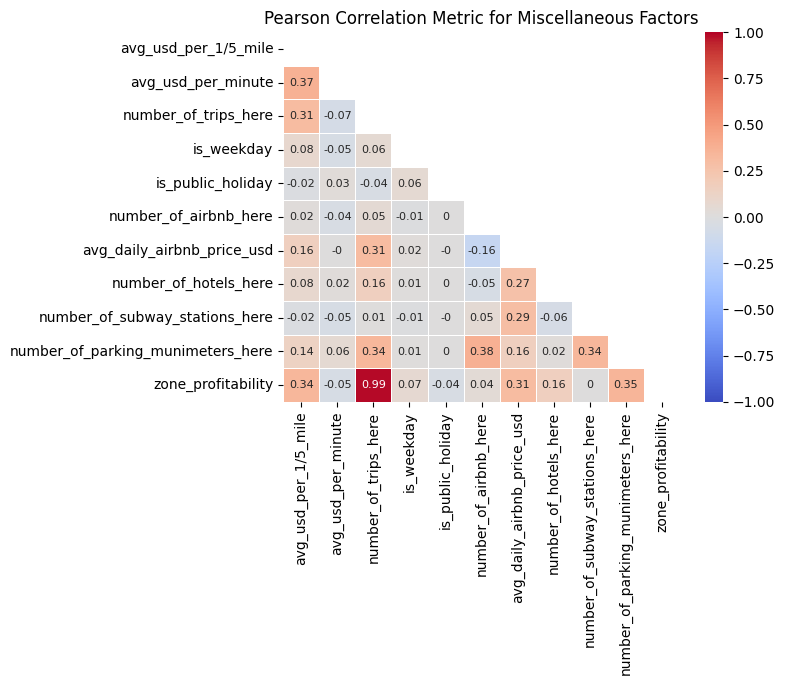

In [7]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr_misc)

# using the upper triangle matrix as mask 

sns.heatmap(corr_misc.round(2), annot=True, mask=matrix, annot_kws={"size":8}, linewidths=0.5, cmap='coolwarm', vmin=-1, vmax=1)


plt.title('Pearson Correlation Metric for Miscellaneous Factors')
plt.show()


### Check relationship between attributes of interest and job type

In [19]:
CORR_COLS = [
    #"month", "day_of_month", "hour","day_of_week", 
    "avg_usd_per_1/5_mile", "avg_usd_per_minute",
    "number_of_trips_here", 'total_pop', 'avg_income_per_cap', 'poverty_%', 'professional_%',
    'service_%', 'office_%', 'construction_%', 'production_%',
    'zone_profitability'
]

pd.set_option('display.max_columns', None)

corr_job = df[CORR_COLS].corr()


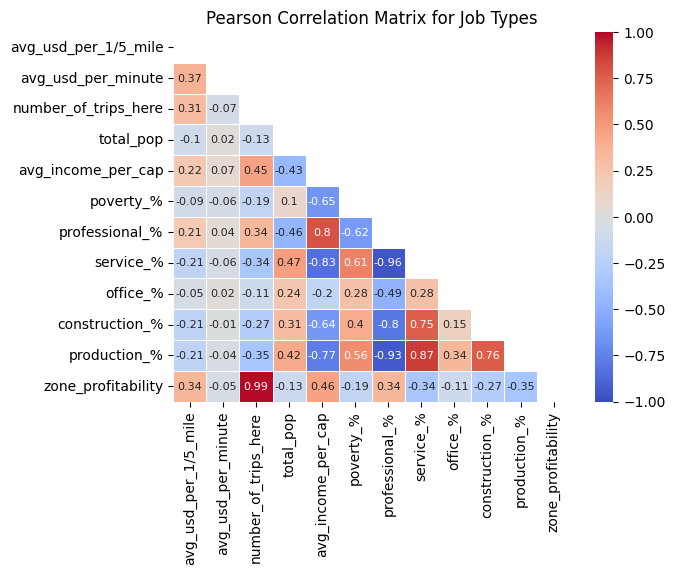

In [20]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr_job)

# using the upper triangle matrix as mask 
sns.heatmap(corr_job.round(2), annot=True, mask=matrix, annot_kws={"size":8}, linewidths=0.5, cmap='coolwarm', vmin=-1, vmax=1)


plt.title('Pearson Correlation Matrix for Job Types')
plt.show()




### Check relationship between attributes of interest and transport preferences

In [21]:
CORR_COLS = [
    #"month", "day_of_month", "hour","day_of_week", 
    "avg_usd_per_1/5_mile", "avg_usd_per_minute",
    "number_of_trips_here", 'total_pop', 'avg_income_per_cap', 'drive_%',
       'carpool_%', 'transit_%', 'walk_%', 'work_at_home_%',
       'avg_commute_mins', 'zone_profitability'
]

pd.set_option('display.max_columns', None)

corr_transport = df[CORR_COLS].corr()


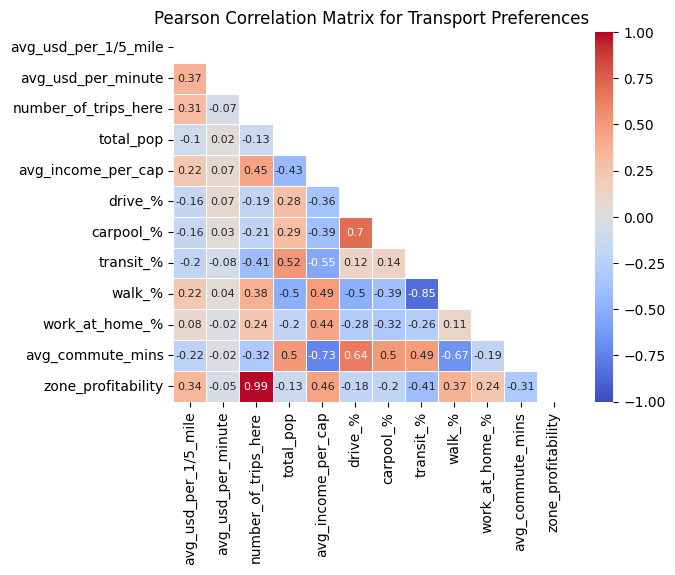

In [22]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr_transport)

# using the upper triangle matrix as mask 
sns.heatmap(corr_transport.round(2), annot=True, mask=matrix, annot_kws={"size":8}, linewidths=0.5, cmap='coolwarm', vmin=-1, vmax=1)


plt.title('Pearson Correlation Matrix for Transport Preferences')
plt.show()




### Check relationship between attributes of interest and type of employment

In [23]:
CORR_COLS = [
    #"month", "day_of_month", "hour","day_of_week", 
    "avg_usd_per_1/5_mile", "avg_usd_per_minute",
    "number_of_trips_here", 'total_pop', 'avg_income_per_cap', 'private_work_%', 'public_work_%',
       'self_employed_%', 'unemployment_%', 'zone_profitability'
]

pd.set_option('display.max_columns', None)

corr_employment = df[CORR_COLS].corr()


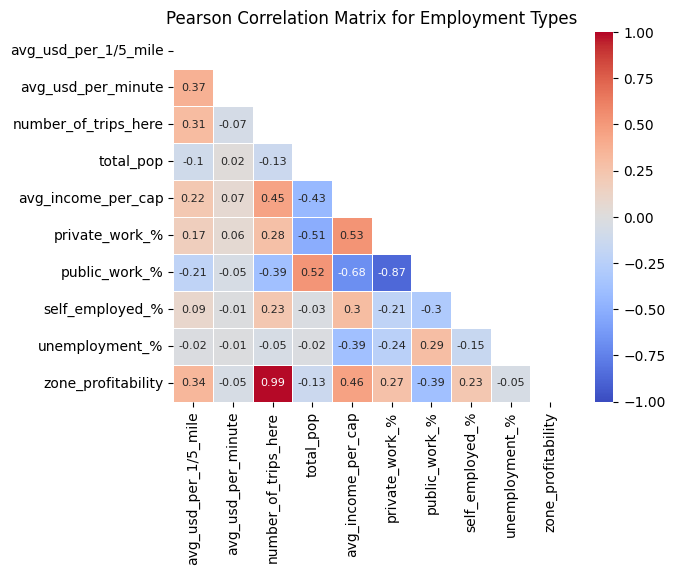

In [24]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr_employment)

# using the upper triangle matrix as mask 
sns.heatmap(corr_employment.round(2), annot=True, mask=matrix, annot_kws={"size":8}, linewidths=0.5, cmap='coolwarm', vmin=-1, vmax=1)


plt.title('Pearson Correlation Matrix for Employment Types')
plt.show()

### Summarise correlations

In [8]:
CORR_COLS = [
    #"month", "day_of_month", "hour","day_of_week", 
    'avg_income_per_cap', 'avg_daily_airbnb_price_usd', 
    'number_of_hotels_here', 'number_of_parking_munimeters_here', 'professional_%',
    'walk_%', 'work_at_home_%', 'private_work_%', 'self_employed_%',
       'avg_commute_mins', 'zone_profitability'
]

pd.set_option('display.max_columns', None)

corr_strong = df[CORR_COLS].corr()


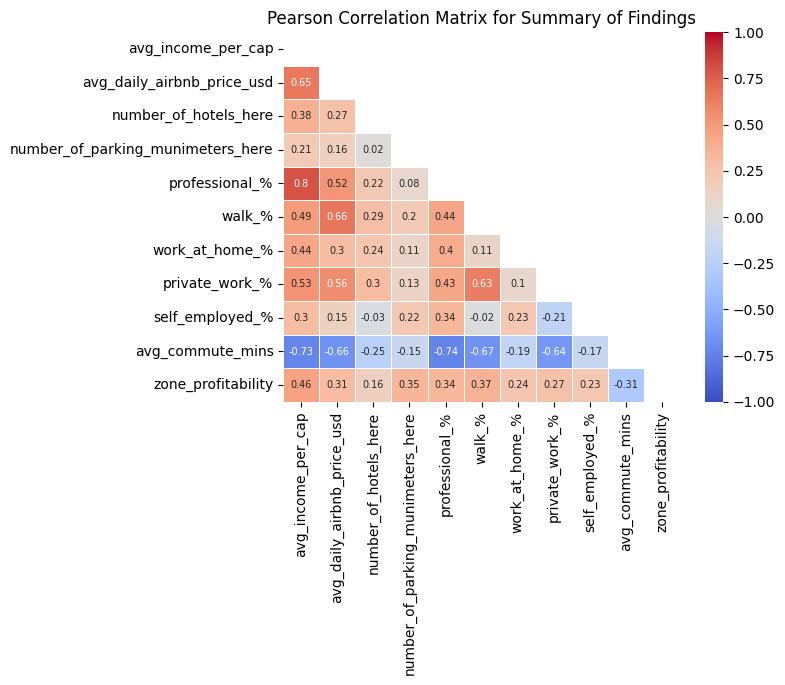

In [9]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr_strong)

# using the upper triangle matrix as mask 
sns.heatmap(corr_strong.round(2), annot=True, mask=matrix, annot_kws={"size":7}, linewidths=0.5, cmap='coolwarm', vmin=-1, vmax=1)


plt.title('Pearson Correlation Matrix for Summary of Findings')
plt.show()